### IMPORTING THE PACKAGES

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.54.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.1 MB)
  Using cached h5py-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached jax-0.4.12-py3-none-any.whl
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached libclang-16.0.0-py2.py3-none-manylinux2010_x86_64.whl (22.9 MB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.23.3-cp37-abi3-manylinux2014_x86_64.whl (304 kB)
  Usin

In [3]:
import tensorflow as tf
print("Tensorflow version: {}".format(tf.__version__))
print("Keras version: {}".format(tf.keras.__version__))

2023-06-20 01:04:07.060241: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-20 01:04:07.062573: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 01:04:07.115333: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 01:04:07.116601: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 01:04:08.112232: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Tensorflow version: 2.12.0
Keras version: 2.12.0


In [4]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [5]:
import keras

### LOADING AND SPLITTING THE DATA

In [6]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 46s 0us/step


In [7]:
print('Training images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [8]:
print(X_train[0].shape)

(32, 32, 3)


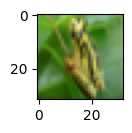

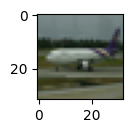

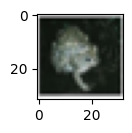

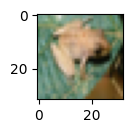

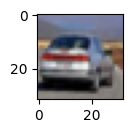

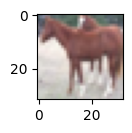

In [9]:
for i in range(232,238):
    plt.subplot(120+ 1 + i)
    img=X_train[i]
    plt.imshow(img)
    plt.show()

### PREPROCESSING DATA

In [10]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = keras.utils.np_utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)
8.
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32 , 32 , 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Hidden Layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(10, activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#Training the model
model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 1)
Epoch 1/20
391/391 [==============================] - 161s 409ms/step - loss: 1.5584 - accuracy: 0.4275 - val_loss: 1.1337 - val_accuracy: 0.5988
Epoch 2/20
  9/391 [..............................] - ETA: 2:25 - loss: 1.1607 - accuracy: 0.5877

KeyboardInterrupt: 

### PREDICTING

In [ ]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

#zip the names and classes to make a dictionary of class labels
class_labels = dict(zip(classes, names))

#generate batch of 9 images to predic
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis= -1)

#make predictions
predictions = model.predict(batch, verbose = 1)

In [ ]:
print(predictions)

In [ ]:
for image in predictions:
    print(np.sum(image))

In [ ]:
class_result = np.argmax(predictions, axis= -1)
print (class_result)

### FINAL OBJECT DETECTION

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: ()\nActual: ()'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
        #plot the image
        axs[i].imshow(img)
        
    #show the plot
    plt.show()
            
